### importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
#read dataset
data = pd.read_csv('database_IND.csv')
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#droping columns with max null values
data = data.drop(columns = ['name','gppd_idnr','other_fuel1','other_fuel2','other_fuel3','owner','url','year_of_capacity_data','country_long','country','wepp_id',
                           'estimated_generation_gwh','generation_data_source'])

In [31]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             908 non-null    float64
 1   latitude                862 non-null    float64
 2   longitude               862 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   commissioning_year      528 non-null    float64
 5   source                  908 non-null    object 
 6   geolocation_source      889 non-null    object 
 7   generation_gwh_2013     384 non-null    float64
 8   generation_gwh_2014     401 non-null    float64
 9   generation_gwh_2015     425 non-null    float64
 10  generation_gwh_2016     437 non-null    float64
 11  generation_gwh_2017     443 non-null    float64
 12  generation_data_source  450 non-null    object 
dtypes: float64(9), object(4)
memory usage: 92.3+ KB


In [32]:
#filling null values
data['latitude'] =  data['latitude'].fillna(data['latitude'].mean())
data['longitude'] =  data['longitude'].fillna(data['longitude'].median())
data['commissioning_year'] =  data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['geolocation_source'] =  data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['generation_gwh_2013'] =  data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].median())
data['generation_gwh_2014'] =  data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median())
data['generation_gwh_2015'] =  data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median())
data['generation_gwh_2016'] =  data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median())
data['generation_gwh_2017'] =  data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median())

In [33]:
#string to int
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [34]:
data.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.150963
primary_fuel           0.471141
commissioning_year    -1.779021
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
dtype: float64

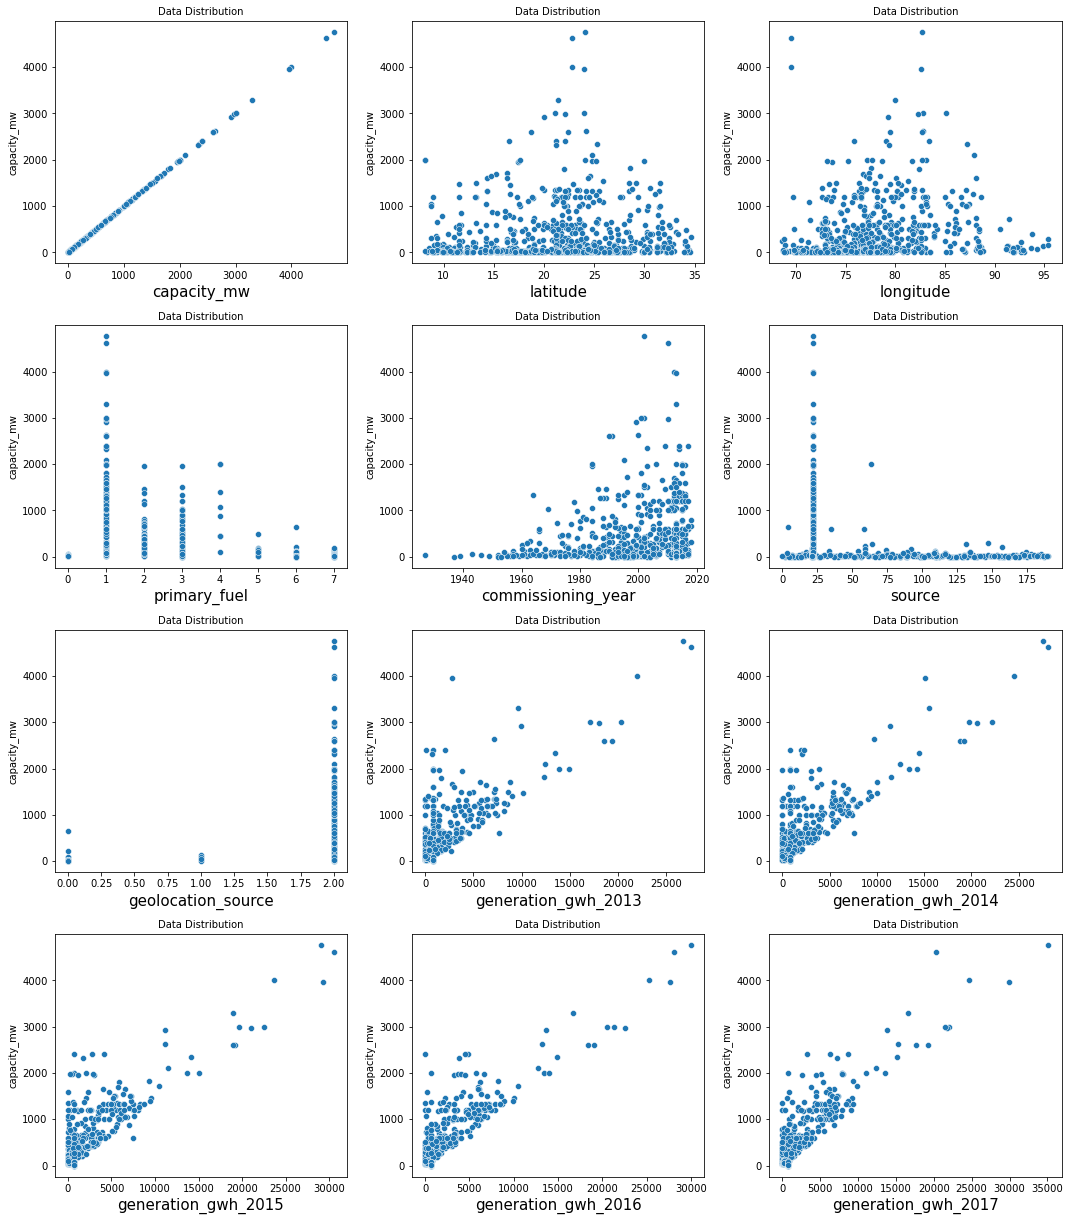

In [35]:
#plotting scatter plot
plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['capacity_mw'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [36]:
#checking correlation
corr = data.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.200473,-0.377783,0.012518,-0.241701,0.204698,0.756523,0.804581,0.830400,0.863989,0.877058
latitude,0.049790,1.000000,0.031483,-0.013453,0.034896,0.055943,-0.183999,0.054483,0.058936,0.054242,0.048095,0.057915
longitude,0.200473,0.031483,1.000000,-0.352749,-0.144785,-0.236349,0.249233,0.102637,0.107967,0.125723,0.148405,0.156255
primary_fuel,-0.377783,-0.013453,-0.352749,1.000000,0.145487,0.053609,-0.482803,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818
commissioning_year,0.012518,0.034896,-0.144785,0.145487,1.000000,0.301660,-0.242439,-0.043554,-0.017599,0.005967,0.030519,0.042622
source,-0.241701,0.055943,-0.236349,0.053609,0.301660,1.000000,-0.505823,-0.121131,-0.125425,-0.131500,-0.136135,-0.135138
geolocation_source,0.204698,-0.183999,0.249233,-0.482803,-0.242439,-0.505823,1.000000,0.097530,0.100988,0.105880,0.109612,0.108809
generation_gwh_2013,0.756523,0.054483,0.102637,-0.228761,-0.043554,-0.121131,0.097530,1.000000,0.970385,0.907385,0.878836,0.839297
generation_gwh_2014,0.804581,0.058936,0.107967,-0.240407,-0.017599,-0.125425,0.100988,0.970385,1.000000,0.963664,0.935000,0.903986
generation_gwh_2015,0.830400,0.054242,0.125723,-0.249826,0.005967,-0.131500,0.105880,0.907385,0.963664,1.000000,0.973256,0.940284


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

<AxesSubplot:>

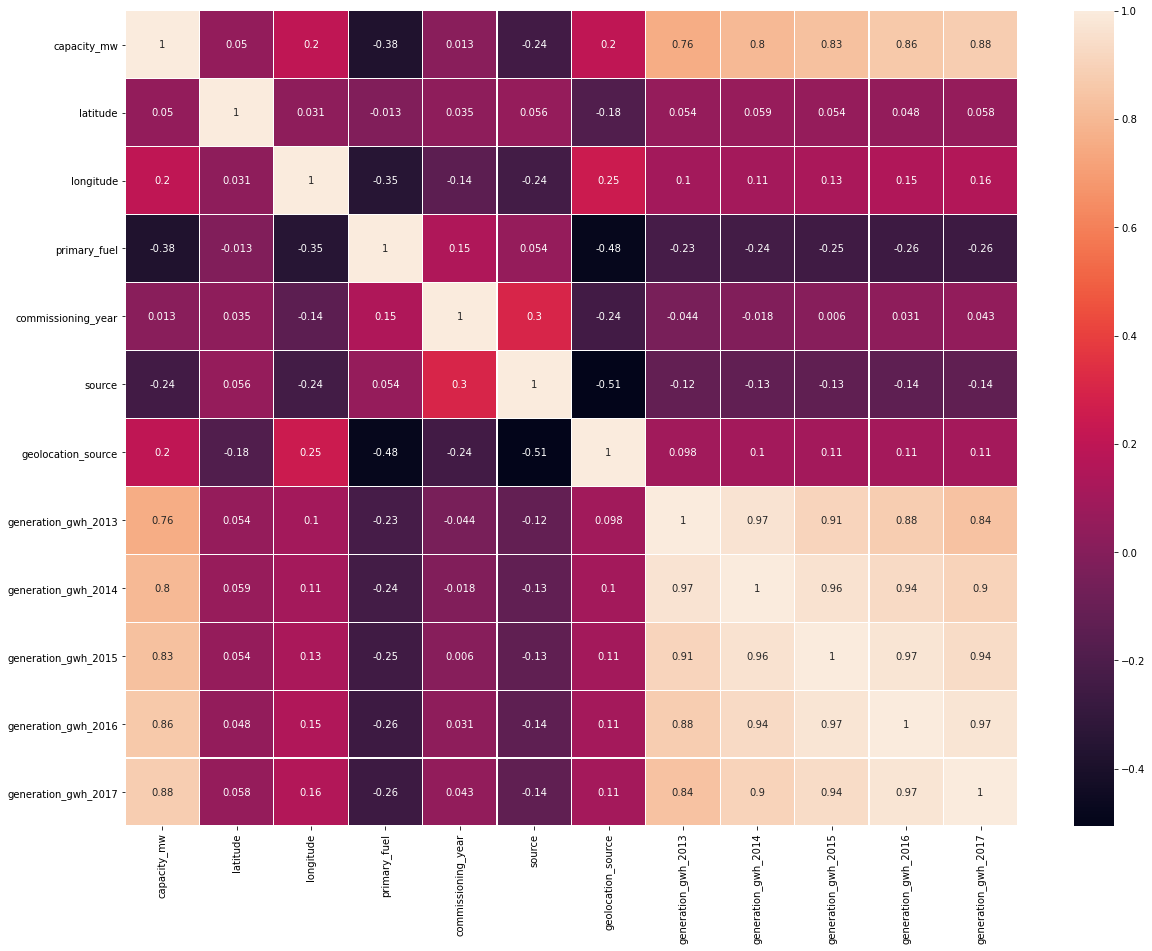

In [37]:
#heatmap
plt.figure(figsize = [20,15])
sns.heatmap(corr,annot=True, linewidths=0.3)

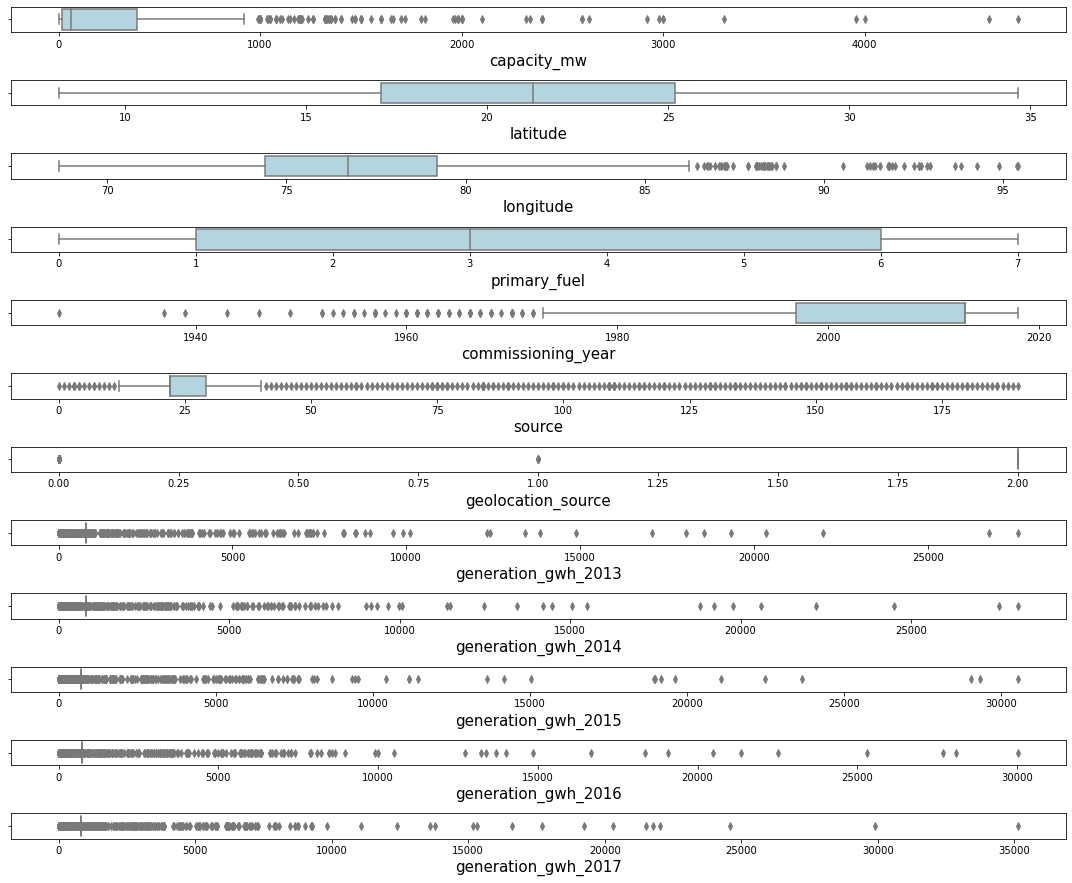

In [40]:
#checking outliers
plt.figure(figsize= (15,20))
pltnum = 1
for i in data:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(data[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

In [42]:
#zscore
from scipy import stats

p = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.54931054 1.1483961  0.87220856 ... 0.26873641 0.27820854 0.27617103]
 [0.38462759 0.58673028 0.58602743 ... 0.26873641 0.27820854 0.27617103]
 [0.48602401 0.11629242 1.68109953 ... 0.26873641 0.27820854 0.27617103]
 ...
 [0.50964868 0.97298691 0.38271188 ... 0.26873641 0.27820854 0.27617103]
 [0.41566731 0.51831341 0.76616907 ... 0.26873641 0.27820854 0.27617103]
 [0.52516854 1.85081984 0.01377542 ... 0.26873641 0.27820854 0.27617103]]

 Row Numbers ==> [ 15  15  15  15  72  81 144 144 144 144 144 144 159 159 180 184 192 210
 210 210 210 210 210 222 240 245 300 309 309 309 309 309 309 322 324 334
 341 343 346 361 364 365 365 365 365 365 365 372 376 389 417 428 445 455
 479 483 485 494 494 494 494 494 494 495 495 495 495 495 495 500 520 530
 533 533 539 542 547 575 584 602 622 624 639 649 649 649 649 649 649 658
 658 658 658 658 658 662 670 690 696 696 696 696 696 707 710 722 722 722
 722 722 725 725 725 725 725 727 727 727 727 727 727 729 787 787 787 787
 787 787 789 808 809 809 80

In [50]:
df = np.where(z>3)[0]

In [46]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.150963
primary_fuel           0.471141
commissioning_year    -1.779021
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
dtype: float64

In [55]:
new = data[(z<1.5).all(axis = 1)]

In [56]:
x1 = new.drop(columns = ['capacity_mw'])
x2 = new.drop(columns = ['primary_fuel'])
y1 = new['capacity_mw']
y2 = new['primary_fuel']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns =x1.columns)
x2 = pd.DataFrame(scaler.fit_transform(x2), columns =x2.columns)

## Fuel type

In [57]:
y2.value_counts()

1    113
3     82
2     39
0     21
5     13
6      8
4      3
Name: primary_fuel, dtype: int64

In [63]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=2)
x_over, y_over = sm.fit_resample(x2,y2)

In [64]:
#best random state
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
rs = 0
for i in range(0,3000):
    x_train,x_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.3, random_state = i)
    lg = LogisticRegression(multi_class = 'multinomial')
    lg.fit(x_train,y_train)
    ts_pred = lg.predict(x_test)
    tr_pred = lg.predict(x_train)
    ts_score = accuracy_score(y_test,ts_pred)
    tr_score = accuracy_score(y_train, tr_pred)
    if round(ts_score*100,1) == round(tr_score*100,1):
        if i>rs:
            rs = i
print('the best random state for the data set is', rs)

the best random state for the data set is 2325


In [65]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over, test_size = 0.3, random_state = rs)

In [66]:
#logistic reg
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_score = accuracy_score(y_test,lg_pred)
print(lg_score)

0.6512605042016807


In [67]:
#extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = accuracy_score(y_test,et_pred)
print(et_score)

0.9201680672268907


In [68]:
cv = cross_val_score(lg,x_over,y_over, cv =7)
cv = cv.mean()
cv

0.6321112515802781

In [70]:
cv1 = cross_val_score(et,x_over,y_over, cv =7)
cv1 = cv1.mean()
cv1

0.940581542351454

In [71]:
mod = [lg_score,et_score]
cv  = [cv,cv1]
sel = pd.DataFrame({})
sel['mod'] = mod
sel['cv'] = cv
sel['diff'] = sel['mod'] - sel['cv']
sel

,mod,cv,diff
0,0.651261,0.632111,0.019149
1,0.920168,0.940582,-0.020413


### best model is Extra Trees Regressor

## Capacity

In [72]:
#best random state
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
rs = 0
for i in range(0,2000):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state = i, test_size = 0.3)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_test,y_test)
    if round(tr_score*100,1) == round(ts_score*100,1):
        if i> rs:
            rs = i
print('the best random state is', rs)

the best random state is 1862


In [74]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.3,random_state =rs)

In [88]:
#linear reg
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_score = lr.score(x_test,y_test)
print(lr_score)

0.44589656221222085


In [89]:
#RMSE
from sklearn.metrics import mean_squared_error
lr_rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
print(lr_rmse)

198.31768422575885


In [85]:
#extra trees reg
from sklearn.ensemble import ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(x_train,y_train)
er_pred = er.predict(x_test)
er_score = er.score(x_test,y_test)
print(er_score)

0.7439478941810891


In [90]:
#RMSE
er_rmse = np.sqrt(mean_squared_error(y_test,er_pred))
print(er_rmse)

134.81251045469457


In [83]:
c2 = cross_val_score(lr,x1,y1,scoring ='r2',cv = 7)
c2 = c2.mean()
c2

0.3415527129745513

In [91]:
cv3 = cross_val_score(er,x1,y1,scoring ='r2',cv = 7)
cv3 = cv3.mean()
cv3

0.6802887970051142

In [92]:
mod1 = [lr_score,er_score]
cv = [cv2,cv3]
sel1 = pd.DataFrame({})
sel1['mod'] = mod1
sel1['cv'] = cv
sel1['best'] = sel1['mod'] - sel1['cv']
sel1

,mod,cv,best
0,0.445897,0.936789,-0.490892
1,0.743948,0.680289,0.063659


### best model is Extra Trees Regressor